In [317]:
from scipy.io import loadmat
# /mnt/c/Users/Sabrina/Desktop/Spring2021UVA/graphs-proj
file = "C:\\Users\\Sabrina\\Desktop\\Spring2021UVA\\graphs-proj\\EEG-MRI-graph-construction\\correlation\\sub-xp101\\eegfmriNF.mat"
import pandas as pd
import numpy as np
from os.path import dirname, join as pjoin
import scipy.io as sio
from networkx.algorithms import community 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


In [388]:
class graph_measures:
    def __init__(self,threshold):
        self.threshold = threshold
        self.avg_node_connect = None
        self.adj_mat = None
        return
    
    def get_eigenvector_centrality(self,G):
        return networkx.eigenvector_centrality(G)
    
    def get_betweenness_centrality (self, G):
        return networkx.betweenness_centrality(G)
        
    def get_node_avg (self, G):
        return networkx.average_node_connectivity(G)
    
    def get_comm_central(self, G):
        return (networkx.community.girvan_newman(G))
                
    def get_adj_threshold(self, adj_mat):
        
        adj_mat[adj_mat <= self.threshold] = 0
        adj_mat[adj_mat > self.threshold] = 1
        return adj_mat
        
    def get_graphs(self, g_type):
        base_name = "C:\\Users\\Sabrina\\Desktop\\Spring2021UVA\\graphs-proj\\EEG-MRI-graph-construction\\correlation\\"
        graph_list1 = []
        graph_list2 = []
        user = "sub-xp"
        graph_type = ["\\eegNF.mat","\\fmriNF.mat" ,"\\eegfmriNF.mat", "\\motorloc.mat"]
        adj_mat_list = []
        for i in range(0,10):
            file = base_name+user+str(i+101)+graph_type[g_type]
            try:
                mat_contents = sio.loadmat(file)
                adj_mat = np.array(mat_contents["rho"])
                adj_mat = self.get_adj_threshold(adj_mat)
                adj_mat_list.append(adj_mat)

                G = networkx.convert_matrix.from_numpy_matrix(adj_mat)
                graph_list1.append(G) 
            except FileNotFoundError: 
                print("FileNotFoundError:" + file)
        return graph_list1

In [389]:
class graph_plots:
    def __init__(self):
        return 
    def get_between_graph(self,graph_list, g):
        t = g.get_betweenness_centrality(graph_list[0])
        for graph in graph_list: 
            d = g.get_betweenness_centrality(graph)

            plt.bar(d.keys(), d.values(), color='g')
       
            plt.show()
            return 
    def get_deg_v_connectivity(self,graph_list, name):
        x_val, y_val = [], []

        for i in graph_list:
            val = nx.average_degree_connectivity(i)
            x = val.keys()
            y = val.values()
            x_val.append(x)
            y_val.append(y)
            plt.scatter(x,y, color = 'g')
        plt.xlabel("degree")
        plt.ylabel("avg connectivity")
        plt.title("degree versus k-avg connectivity of "+name)
        plt.savefig("degree_v_connectivity"+name+".png")
        plt.show()


    def get_eigenvector_centrality(self,graph_list, g, file_name):
        i = 0
        for graph in graph_list: 
            i+=1
            try:
                d = g.get_eigenvector_centrality(graph)

                plt.bar(d.keys(), d.values(), color='g')
                plt.savefig(file_name+str(i))
                plt.show()
            except: return 
        return 
    def get_node_avg(self,graph_list, g, file_name):
        avg_con = []
        for graph in graph_list: 
            d = g.get_node_avg(graph)
            avg_con.append(d)

        plt.hist(avg_con, color='g')
        plt.savefig(file_name)
        plt.show()
        return 

    def graph_avg_and_var(self,graph_list, file_name):
        edge_list = []
        for i in graph_list:
            edge_list.append(i.degree())

        avg_list = []
        var_list = []
        for i in range(0, len(edge_list[0])):
            avg = []
            var = []
            for j in edge_list:
                avg.append(j[i])
                var.append(j[i])

            avg_list.append(np.mean(avg))
            var_list.append(np.var(var))
        


        plt.bar(np.arange(0, 64),np.array(avg_list), color='red', align='center', alpha = 0.5, label = "avg")
        plt.bar( np.arange(0, 64),np.array(var_list) , color='green', align='center',alpha = 0.5, label = "var")
        plt.tight_layout()
        plt.title("average and varience of "+ file_name)
        plt.xlabel("node number")
        plt.ylabel("measure ")
        plt.savefig("var_avg_"+file_name+".png")
        plt.legend()



        plt.show()
    




In [392]:
def main():
    g_plots = graph_plots()

    graph_t, i =["eegNF","fmriNF" ,"eegfmriNF","motorloc"], 0
    for j in graph_t: 
        i+=1
        g = graph_measures(0.75)
        graph_list = g.get_graphs(graph_t.index(j))
        g_plots.graph_avg_and_var(graph_list, j)
        g_plots.get_deg_v_connectivity(graph_list, j)
    

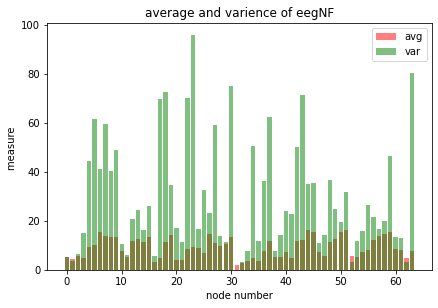

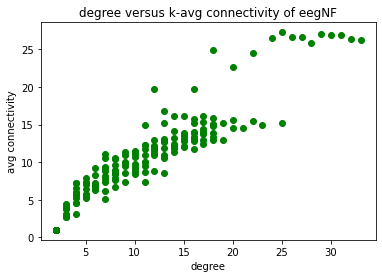

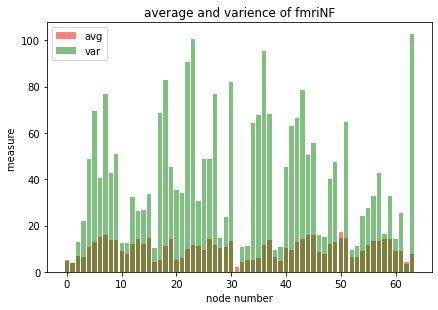

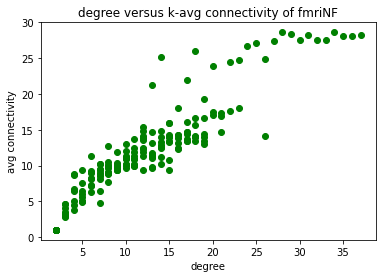

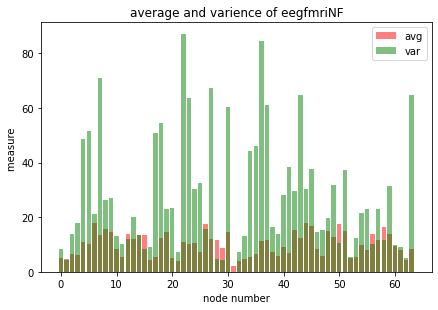

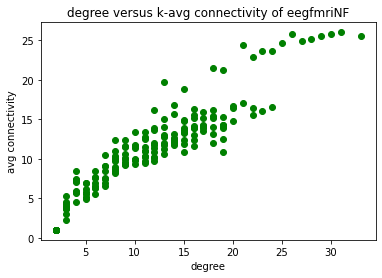

FileNotFoundError:C:\Users\Sabrina\Desktop\Spring2021UVA\graphs-proj\EEG-MRI-graph-construction\correlation\sub-xp102\motorloc.mat


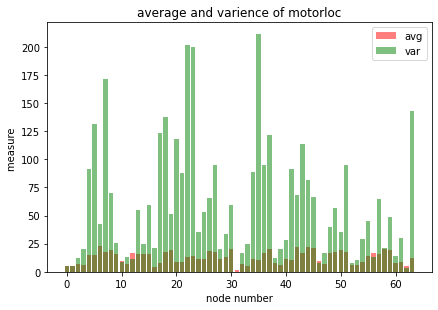

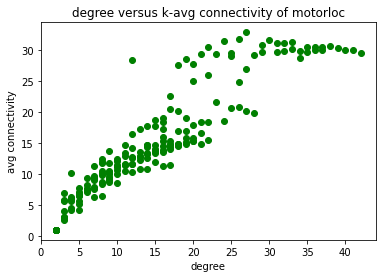

In [393]:
main()

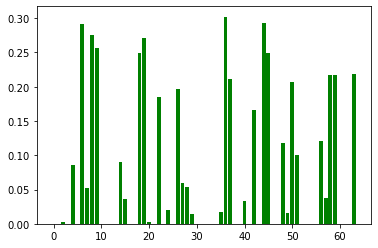

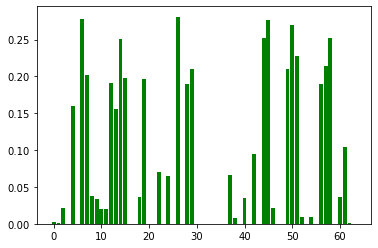

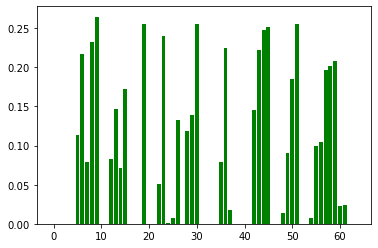

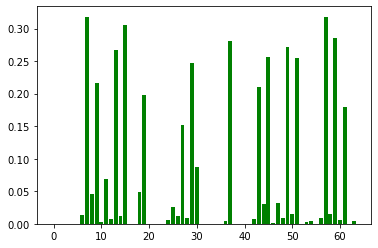

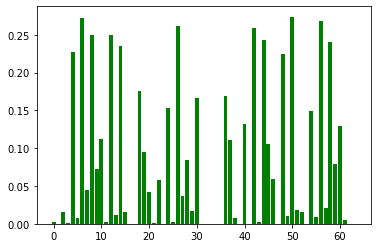

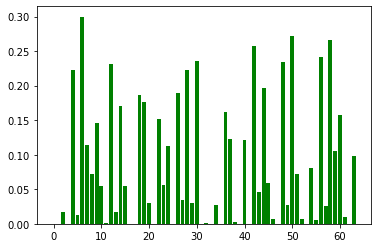

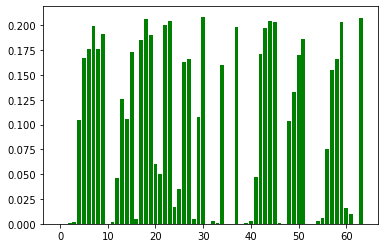

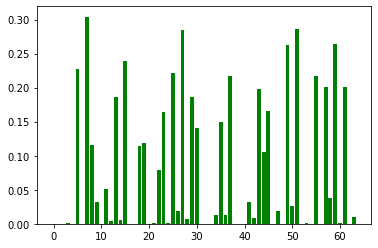

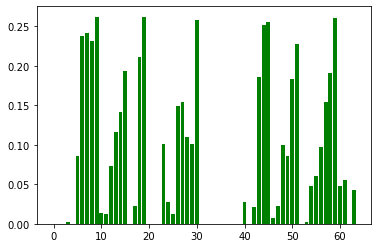

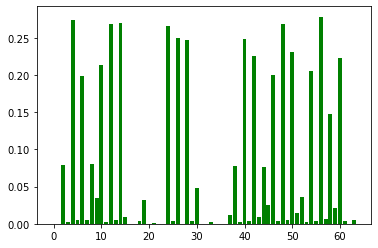

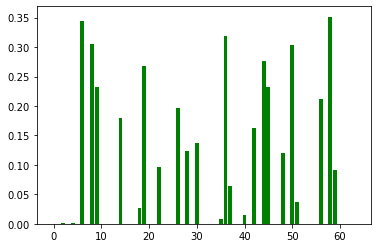

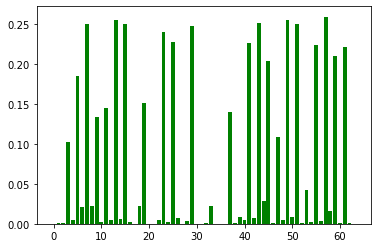

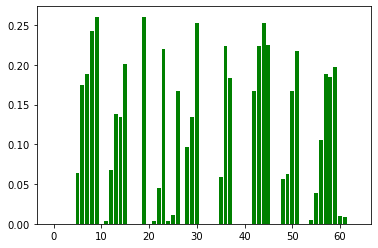

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [50]:
graph_t, i =["eegNF","fmriNF" ,"eegfmriNF"], 0
for j in graph_t: 
    i+=1
    g = graph_measures(0.75)
    graph_list = g.get_graphs(graph_t.index(j))
    
    avg_node = get_eigenvector_centrality(graph_list, g, (j+str(i)))



<BarContainer object of 64 artists>

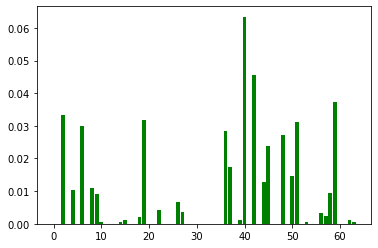

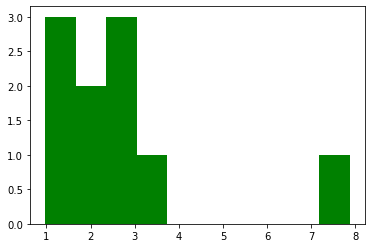